這邊有一個資料集是我去識別後的 POS data
總共四個資料集

basket_item 被分成好幾個因為比較大

請大家嘗試把四個資料及合併並嘗試回答以下問題：
找到最佳的產品與顧客組合能帶給我最高的 revenue

此 side-project 並非現階段重要任務，目的是要讓大家熟悉 pandas, polars （）, chaining
請大家找時間練習，把你發現的竅門跟心得記錄下來做為教材
若太難我們可以將其難度降低，請隨時回饋問題或題目調整
此資料即將作為 pandas 最後章節的應用實戰

### 找到最佳的產品與顧客組合能帶給我最高的 revenue


In [ ]:
hello

In [1]:
# for data cleaning and processing
import numpy as np
import pandas as pd
import datetime as dt

# for drawing
import seaborn as sns
import matplotlib.pyplot as plt

# for ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
data4 = pd.read_csv('basket_items_modified_4月.csv')
data5 = pd.read_csv('basket_items_modified_5月.csv')
data6 = pd.read_csv('basket_items_modified_6月.csv')
data7 = pd.read_csv('basket_items_modified_7月.csv')
data8 = pd.read_csv('basket_items_modified_8月.csv')
data9 = pd.read_csv('basket_items_modified_9月.csv')

df_credit_card = pd.read_csv('credict_card_modified.csv')
df_ele_data = pd.read_csv('ele_data_modified.csv')
df_member_card = pd.read_csv('member_card_modified.csv')
df_basket_items= pd.concat([data4, data5,data6,data7,data8,data9])


In [3]:
df_credit_card.head()

,項次,銷售日期,機台,序號,時間,交易型態,授權碼,調閱編號,卡號,授權銀行簡稱,信用卡金額,信用卡紅利折抵,過卡方式,員工代號
0,1,2018/4/2,585066,3069,08:05,銷售交易,513882,14212,26863375,中國信託,85,0,感應,84556
1,2,2018/4/2,585066,1055,08:25,銷售交易,36241,9436,36167221,台新銀行,125,0,感應,84556
2,3,2018/4/2,585066,1822,08:29,銷售交易,115289,34561,26624795,台新銀行,600,0,感應,84556
3,4,2018/4/2,585066,455,08:41,銷售交易,103003,39485,13380618,台新銀行,288,0,刷卡,84556
4,5,2018/4/2,585066,1074,08:54,銷售交易,320945,25995,13721636,中國信託,158,0,感應,84556


### 處理df_basket_items

In [4]:
# 檢查空值
df_basket_items.isna().any()

門市代碼     False
銷售日期     False
機台       False
序號       False
貨號       False
短品名      False
條碼       False
銷售數量     False
單價       False
總金額      False
門市代碼_    False
機台_      False
序號_      False
dtype: bool

In [5]:
df_basket_items.drop(['門市代碼_', '機台_', '序號_'], axis=1, inplace=True)

In [6]:
df_basket_items['門市代碼']=df_basket_items['門市代碼'].astype('object')
df_basket_items['銷售日期']=pd.to_datetime(df_basket_items['銷售日期'])
df_basket_items['機台']=df_basket_items['機台'].astype('object')
df_basket_items['序號']=df_basket_items['序號'].astype('object')
df_basket_items['貨號']=df_basket_items['貨號'].astype('object')
df_basket_items['條碼']=df_basket_items['條碼'].astype('object')

In [7]:
df_basket_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004239 entries, 0 to 148013
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   門市代碼    1004239 non-null  object        
 1   銷售日期    1004239 non-null  datetime64[ns]
 2   機台      1004239 non-null  object        
 3   序號      1004239 non-null  object        
 4   貨號      1004239 non-null  object        
 5   短品名     1004239 non-null  object        
 6   條碼      1004239 non-null  object        
 7   銷售數量    1004239 non-null  int64         
 8   單價      1004239 non-null  int64         
 9   總金額     1004239 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 84.3+ MB


In [8]:
# 檢查重複
df_basket_items.duplicated().value_counts()

False    986842
True      17397
dtype: int64

In [9]:
# #把重複地拿掉
# df_basket_items.drop_duplicates(inplace=True)

In [10]:
#df_basket_items.loc[df_basket_items.duplicated()]

In [11]:
df_basket_items.describe()

,銷售數量,單價,總金額
count,1.004239e+06,1.004239e+06,1.004239e+06
mean,1.279845e+00,7.715104e+01,6.545711e+01
std,1.160667e+00,4.280628e+02,8.556094e+01
min,-1.440000e+02,0.000000e+00,-3.999000e+03
25%,1.000000e+00,2.400000e+01,2.600000e+01
50%,1.000000e+00,4.300000e+01,4.800000e+01
75%,1.000000e+00,7.900000e+01,8.200000e+01
max,1.680000e+02,1.999900e+04,6.540000e+03


In [12]:
df_basket_items.describe(include = 'object')

,門市代碼,機台,序號,貨號,短品名,條碼
count,1004239,1004239,1004239,1004239,1004239,1004239
unique,1,3,933,9382,9429,12522
top,585000,66,2555,12897,瑞仕鑽石鍋印花,41048
freq,1004239,462337,4605,53091,53091,53091


In [13]:
df_basket_items.head()

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額
0,585000,2018-04-02,43,752,11621,美國甜橙#138,54883,2,15,30
1,585000,2018-04-02,43,3159,8414,維也納餐包,57649,1,39,39
2,585000,2018-04-02,43,1203,19487,蘇菲加長護墊,15355,1,75,75
3,585000,2018-04-02,47,2116,45809,可口奶滋鳳梨,53891,1,29,29
4,585000,2018-04-02,47,2116,18902,ＪＯ全店印花,39811,1,0,0


In [14]:
df_basket_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004239 entries, 0 to 148013
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   門市代碼    1004239 non-null  object        
 1   銷售日期    1004239 non-null  datetime64[ns]
 2   機台      1004239 non-null  object        
 3   序號      1004239 non-null  object        
 4   貨號      1004239 non-null  object        
 5   短品名     1004239 non-null  object        
 6   條碼      1004239 non-null  object        
 7   銷售數量    1004239 non-null  int64         
 8   單價      1004239 non-null  int64         
 9   總金額     1004239 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 84.3+ MB


In [15]:
df_commodity_count = df_basket_items.groupby('短品名')['銷售數量'].sum().reset_index().sort_values(by='銷售數量',ascending=False)
df_commodity_count.head(20)

,短品名,銷售數量
5692,瑞仕鑽石鍋印花,102967
9400,ＪＯ全店印花,52510
8417,陽光金圓頭52,18729
1496,北市環保兩用大,12456
6781,義進牧場EG,7890
6319,紐西蘭奇異#102,7037
4650,機能力多蛋,6306
8830,香蕉（Ａ）,6091
9063,鴻喜菇(好菇道),5497
6309,紐-富士蘋果#80,5164


In [16]:
df_commodity_price = df_basket_items.groupby('短品名')['總金額'].sum().reset_index().sort_values(by='總金額',ascending=False)
df_commodity_price.head(20)

,短品名,總金額
4244,林鳳營100%,558044
1149,光泉100%純,431832
1338,冷藏鮭魚輪切,332001
6781,義進牧場EG,330200
4650,機能力多蛋,318704
8417,陽光金圓頭52,298512
5712,瑞穗全脂鮮奶,263895
6978,舒潔抽取棉柔,262880
8515,雞胸肉(去皮),235393
4245,林鳳營低脂鮮乳,229341


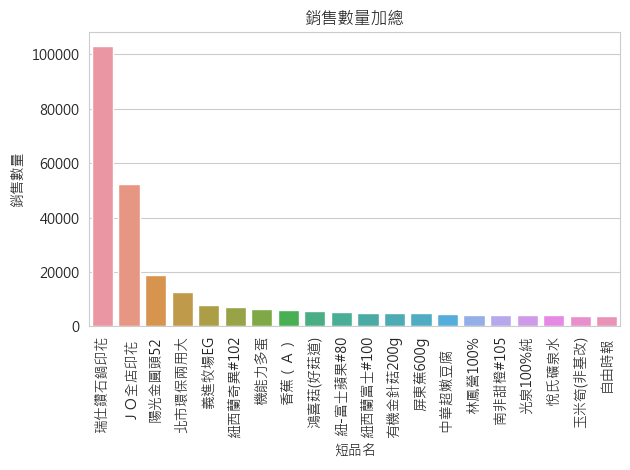

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

# 使用groupby計算'銷售數量'加總
df_grouped = df_basket_items.groupby('短品名')['銷售數量'].sum().reset_index().sort_values(by='銷售數量',ascending=False)
df_grouped_top20 = df_grouped.head(20)
# 使用Seaborn繪製條形圖
sns.barplot(x='短品名', y='銷售數量', data=df_grouped_top20)

# 設定圖表標題和軸標籤
plt.title('銷售數量加總')
plt.xlabel('短品名')
plt.ylabel('銷售數量')

# 轉換X軸標籤為垂直方向
plt.xticks(rotation=90)
# 調整圖表大小，避免標籤重疊
plt.tight_layout()

# 顯示圖表
plt.show()

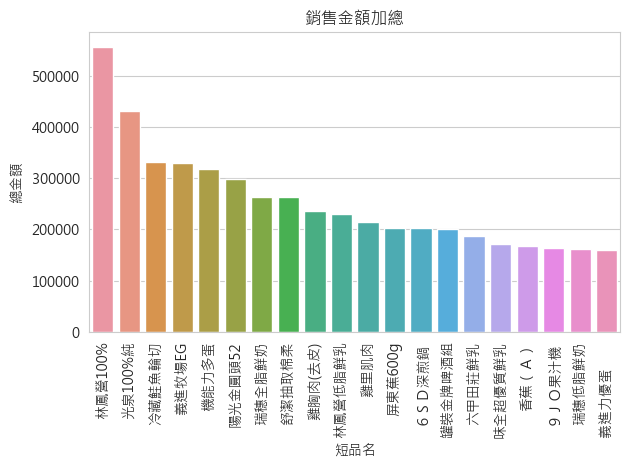

In [18]:
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

# 使用groupby計算'銷售數量'加總
df_grouped = df_basket_items.groupby('短品名')['總金額'].sum().reset_index().sort_values(by='總金額',ascending=False)
df_grouped_top20 = df_grouped.head(20)
# 使用Seaborn繪製條形圖
sns.barplot(x='短品名', y='總金額', data=df_grouped_top20)

# 設定圖表標題和軸標籤
plt.title('銷售金額加總')
plt.xlabel('短品名')
plt.ylabel('總金額')

# 轉換X軸標籤為垂直方向
plt.xticks(rotation=90)
# 調整圖表大小，避免標籤重疊
plt.tight_layout()

# 顯示圖表
plt.show()

### 處理df_credit_card 格式

In [19]:
# 檢查空值
df_credit_card.isna().any()

項次         False
銷售日期       False
機台         False
序號         False
時間         False
交易型態       False
授權碼        False
調閱編號       False
卡號         False
授權銀行簡稱     False
信用卡金額      False
信用卡紅利折抵    False
過卡方式       False
員工代號       False
dtype: bool

In [20]:
df_credit_card['項次']=df_credit_card['項次'].astype('object')
df_credit_card['銷售日期']=pd.to_datetime(df_credit_card['銷售日期'])
df_credit_card['機台']=df_credit_card['機台'].astype('object')
df_credit_card['序號']=df_credit_card['序號'].astype('object')
df_credit_card['時間']=pd.to_datetime(df_credit_card['時間'])
df_credit_card['時間']=df_credit_card['時間'].dt.strftime('%H:%M')
df_credit_card['授權碼']=df_credit_card['授權碼'].astype('object')
df_credit_card['調閱編號']=df_credit_card['調閱編號'].astype('object')
df_credit_card['卡號']=df_credit_card['卡號'].astype('object')
df_credit_card['員工代號']=df_credit_card['員工代號'].astype('object')


In [21]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48729 entries, 0 to 48728
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   項次       48729 non-null  object        
 1   銷售日期     48729 non-null  datetime64[ns]
 2   機台       48729 non-null  object        
 3   序號       48729 non-null  object        
 4   時間       48729 non-null  object        
 5   交易型態     48729 non-null  object        
 6   授權碼      48729 non-null  object        
 7   調閱編號     48729 non-null  object        
 8   卡號       48729 non-null  object        
 9   授權銀行簡稱   48729 non-null  object        
 10  信用卡金額    48729 non-null  object        
 11  信用卡紅利折抵  48729 non-null  object        
 12  過卡方式     48729 non-null  object        
 13  員工代號     48729 non-null  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 5.2+ MB


In [22]:
# 檢查重複
df_credit_card.duplicated().value_counts()

False    48729
dtype: int64

In [23]:
df_credit_card.describe(include = 'object')

,項次,機台,序號,時間,交易型態,授權碼,調閱編號,卡號,授權銀行簡稱,信用卡金額,信用卡紅利折抵,過卡方式,員工代號
count,48729,48729,48729,48729,48729,48729,48729,48729,48729,48729,48729,48729,48729
unique,489,3,903,912,2,43058,12541,6814,2,2147,9,3,15
top,1,585066,2555,19:15,銷售交易,393459,10331,34854522,中國信託,200,0,感應,59197
freq,173,21998,214,108,48287,216,22,160,27948,404,48721,38721,8838


### 處理ele_data 格式

### 處理member_data 格式

------

## 嘗試合併表格

In [24]:
df_basket_items[(df_basket_items['序號']==3069) & (df_basket_items['銷售日期']=='2018-04-02')& (df_basket_items['機台']==66)]


,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額
3894,585000,2018-04-02,66,3069,27505,日正優質果糖,19945,1,48,48
3895,585000,2018-04-02,66,3069,34326,白吐司(條),58310,1,37,37


In [25]:
df_credit_card[(df_credit_card['序號']==3069) & (df_credit_card['銷售日期']=='2018-04-02')]

,項次,銷售日期,機台,序號,時間,交易型態,授權碼,調閱編號,卡號,授權銀行簡稱,信用卡金額,信用卡紅利折抵,過卡方式,員工代號
0,1,2018-04-02,585066,3069,08:05,銷售交易,513882,14212,26863375,中國信託,85,0,感應,84556


處理ele_data

In [26]:
df_basket_items[(df_basket_items['序號']==2513) & (df_basket_items['銷售日期']=='2018-04-02') & (df_basket_items['機台']==66)]

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額
2158,585000,2018-04-02,66,2513,60099,高達乾酪片,16967,1,105,105
2159,585000,2018-04-02,66,2513,15881,茂谷柑,32563,1,79,79
2160,585000,2018-04-02,66,2513,44943,屏東蕉600g,7529,1,49,49
2332,585000,2018-04-02,66,2513,51739,農心辛拉麵,25119,2,32,64
2333,585000,2018-04-02,66,2513,18902,ＪＯ全店印花,39811,1,0,0
2390,585000,2018-04-02,66,2513,32981,澳穀飼牛漢堡排,45946,1,189,189
2391,585000,2018-04-02,66,2513,15881,茂谷柑,32563,1,79,79
2392,585000,2018-04-02,66,2513,42990,鳳梨(削皮),20763,1,69,69
2393,585000,2018-04-02,66,2513,43759,牧大寶貝蛋,18287,1,62,62
2394,585000,2018-04-02,66,2513,22672,茄子,15962,1,29,29


In [27]:
df_ele_data[(df_ele_data['序號']==2513) & (df_ele_data['銷售日期']=='2018/4/2')]

,項次,銷售日期,機台,序號,時間,交易型態,票證晶片碼,交易前餘額,扣款金額,現金加值金額,現金加值取消,自動加值金額,交易後餘額,票證種類
0,1,2018/4/2,585066,2513,22:33,銷售交易,8597084,874,297,0,0,0,577,悠遊卡


In [28]:
df_credit_card[(df_credit_card['序號']==2513) & (df_credit_card['銷售日期']=='2018-04-02')]

,項次,銷售日期,機台,序號,時間,交易型態,授權碼,調閱編號,卡號,授權銀行簡稱,信用卡金額,信用卡紅利折抵,過卡方式,員工代號
65,66,2018-04-02,585066,2513,16:40,銷售交易,501890,7218,15962389,中國信託,450,0,刷卡,84556


處理member_card

In [29]:
df_basket_items[(df_basket_items['序號']==1066) & (df_basket_items['銷售日期']=='2018-04-02') & (df_basket_items['機台']==66)]

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額
1281,585000,2018-04-02,66,1066,62378,南投蕉600g,50910,1,49,49
1282,585000,2018-04-02,66,1066,60500,小饞優格原味,55364,1,23,23


In [30]:
df_member_card[(df_member_card['交易序號']==1066) & (df_member_card['日期']=='2018/4/2') & (df_member_card['機台']==585066)]

,序號,日期,機台,交易序號,時間,發票字軌號碼,銷貨型態,福利卡編號,本 次加值金額,本次扣儲值金額,本次紅利抵現金額,紅利點數,非 IC 卡,消費金額
0,2,2018/4/2,585066,1066,08:01,118554,消費結帳,2606791,0,0,0,0,72,72


## 結論：
* 用【銷售日期+機台+序號】合併表格
* 機台需要再+5850

In [31]:
df_basket_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004239 entries, 0 to 148013
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   門市代碼    1004239 non-null  object        
 1   銷售日期    1004239 non-null  datetime64[ns]
 2   機台      1004239 non-null  object        
 3   序號      1004239 non-null  object        
 4   貨號      1004239 non-null  object        
 5   短品名     1004239 non-null  object        
 6   條碼      1004239 non-null  object        
 7   銷售數量    1004239 non-null  int64         
 8   單價      1004239 non-null  int64         
 9   總金額     1004239 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 84.3+ MB


## 購物籃分析

In [32]:
df_basket_items['購物籃編號'] = df_basket_items['銷售日期'].dt.strftime('%Y%m%d') + '5850' + df_basket_items['機台'].astype(str) + df_basket_items['序號'].astype(str)
df_basket_items['購物籃營收'] = df_basket_items.groupby('購物籃編號')['總金額'].transform('sum')
df_basket_items.sort_values(by='購物籃營收',ascending=False)


,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額,購物籃編號,購物籃營收
134990,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
135490,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
135488,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,20,238,2380,20180423585047833,28084
135487,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
135486,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
...,...,...,...,...,...,...,...,...,...,...,...,...
155540,585000,2018-08-23,47,2020,62609,桂格穀珍黑穀珍,22276,-5,89,-415,201808235850472020,-11673
155539,585000,2018-08-23,47,2020,18600,維力炸醬素１２,25556,-5,99,-495,201808235850472020,-11673
155538,585000,2018-08-23,47,2020,63043,黑松沙士 245箱,7158,-8,175,-1400,201808235850472020,-11673
155537,585000,2018-08-23,47,2020,34130,Enaak 點心麵,64643,-2,199,-356,201808235850472020,-11673


In [ ]:
df_basket_items.head()

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額,購物籃編號,購物籃營收
0,585000,2018-04-02,43,752,11621,美國甜橙#138,54883,2,15,30,20180402585043752,108
1,585000,2018-04-02,43,3159,8414,維也納餐包,57649,1,39,39,201804025850433159,39
2,585000,2018-04-02,43,1203,19487,蘇菲加長護墊,15355,1,75,75,201804025850431203,75
3,585000,2018-04-02,47,2116,45809,可口奶滋鳳梨,53891,1,29,29,201804025850472116,29
4,585000,2018-04-02,47,2116,18902,ＪＯ全店印花,39811,1,0,0,201804025850472116,29


找出最高營收的購物籃

In [33]:
revenue_per_basket = df_basket_items.groupby('購物籃編號')['總金額'].sum()
df_revenue_per_basket = revenue_per_basket.to_frame()
df_revenue_per_basket.sort_values(by='總金額',ascending=False).head(15)

,總金額
購物籃編號,
20180423585047833,28084
201806075850663363,16834
201804215850471624,14994
201808315850433169,12335
201808175850472397,12000
201808235850471666,11673
201808255850662885,10543
201808265850433072,10434
201807275850662461,10371


In [34]:
df_basket_items[df_basket_items['購物籃編號'] == '20180423585047833']

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額,購物籃編號,購物籃營收
134982,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
134983,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
134984,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
134985,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
134986,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
...,...,...,...,...,...,...,...,...,...,...,...,...
136736,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
137079,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
137080,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084
137355,585000,2018-04-23,47,833,9946,皂福洗衣皂精,22556,2,238,238,20180423585047833,28084


## Apriori演算法

In [35]:
columns_to_keep = ['短品名', '購物籃編號']
df_apriori = df_basket_items.filter(columns_to_keep)

In [36]:
df_apriori

,短品名,購物籃編號
0,美國甜橙#138,20180402585043752
1,維也納餐包,201804025850433159
2,蘇菲加長護墊,201804025850431203
3,可口奶滋鳳梨,201804025850472116
4,ＪＯ全店印花,201804025850472116
...,...,...
148009,屏東蕉600g,20180921585066347
148010,中國時報,20180921585066347
148011,瑞仕鑽石鍋印花,201809215850662073
148012,1 呎烤肉夾,201809215850432052


In [37]:
df_apriori = df_apriori.groupby('購物籃編號')['短品名'].apply(list).reset_index(name='品項')
df_apriori['品項'] = df_apriori['品項'].apply(lambda x: list(set(x)))  # 使用集合去除重複值
df_apriori

,購物籃編號,品項
0,201804025850431000,[蘇菲極緻柔貼40]
1,201804025850431016,"[青蔥, ＪＯ全店印花, 蘋果日報, 味丹多喝水, 水豆腐, 可爾必思乳酸飲, 結球白菜, ..."
2,201804025850431025,[悅氏礦泉水]
3,201804025850431026,"[里港文富餛飩, 義進牧場EG]"
4,201804025850431030,[寒天-百香果綠]
...,...,...
244693,20180921585066962,"[柳營鮮乳, 瑞仕鑽石鍋印花]"
244694,20180921585066963,[必安住殺蟑餌劑]
244695,20180921585066969,"[活益多原味, 陽光黃金豆豆漿, 活益多減糖]"
244696,20180921585066971,"[自然零藍莓優酪, 超極小粒納豆, 春風抽取衛生紙, 南非甜橙#105, 瑞仕鑽石鍋印花, ..."


In [38]:
transactions = df_apriori['品項'].tolist()
# 把一些附屬品刪除
transactions = [[item for item in sublist if item not in ['瑞仕鑽石鍋印花', 'ＪＯ全店印花','北市環保兩用大']] for sublist in transactions]

參數還要再進行調整

In [39]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.01, min_lift = 2, min_length = 2, max_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({'聯合報', '中國時報'}), support=0.0021209817816246965, ordered_statistics=[OrderedStatistic(items_base=frozenset({'中國時報'}), items_add=frozenset({'聯合報'}), confidence=0.42471358428805234, lift=31.20917857300836), OrderedStatistic(items_base=frozenset({'聯合報'}), items_add=frozenset({'中國時報'}), confidence=0.15585585585585585, lift=31.209178573008355)]),
 RelationRecord(items=frozenset({'雪白菇(好菇道)', '鴻喜菇(好菇道)'}), support=0.006877865777407253, ordered_statistics=[OrderedStatistic(items_base=frozenset({'雪白菇(好菇道)'}), items_add=frozenset({'鴻喜菇(好菇道)'}), confidence=0.5359872611464968, lift=27.467017974455594), OrderedStatistic(items_base=frozenset({'鴻喜菇(好菇道)'}), items_add=frozenset({'雪白菇(好菇道)'}), confidence=0.35246073298429315, lift=27.46701797445559)])]

In [40]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.sort_values(by='Lift',ascending=False)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,中國時報,聯合報,0.002121,0.424714,31.209179
1,雪白菇(好菇道),鴻喜菇(好菇道),0.006878,0.535987,27.467018
